Import Packages

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [24]:
parent_dir = '../../data/ping_pong/'

NMSG = 100_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}1/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}1/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}1/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}1/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [25]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 15 14:05:37 2025 +0100) (509.64ms ela...,5.130,0.0000,0.667,7.29,0.60,35.82,65.23 C,Nominal
1,(Sat Mar 15 14:05:37 2025 +0100) (507.10ms ela...,6.220,0.0564,0.929,8.48,0.90,42.78,65.23 C,Nominal
2,(Sat Mar 15 14:05:38 2025 +0100) (506.17ms ela...,4.520,0.0605,0.811,6.72,0.65,35.62,64.73 C,Nominal
3,(Sat Mar 15 14:05:38 2025 +0100) (505.86ms ela...,4.150,0.1150,0.974,6.64,0.88,47.84,64.73 C,Nominal
4,(Sat Mar 15 14:05:39 2025 +0100) (507.29ms ela...,0.583,0.0526,0.726,2.81,0.40,24.92,64.21 C,Nominal


In [26]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(35, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 15 14:05:47 2025 +0100) (57.86ms elap...,36.5,0.00000,1.33,38.47,3.99,99.73,63.01 C,Nominal
1,(Sat Mar 15 14:05:47 2025 +0100) (54.53ms elap...,35.2,0.00000,1.49,37.89,4.02,100.43,63.56 C,Nominal
2,(Sat Mar 15 14:05:48 2025 +0100) (55.90ms elap...,38.4,0.27200,2.29,41.65,3.96,99.13,63.56 C,Nominal
3,(Sat Mar 15 14:05:48 2025 +0100) (54.28ms elap...,38.5,0.00112,1.67,40.87,4.00,99.97,63.56 C,Nominal
4,(Sat Mar 15 14:05:48 2025 +0100) (55.61ms elap...,34.7,0.58100,1.60,39.89,3.98,99.53,63.56 C,Nominal


In [27]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 15 14:04:42 2025 +0100) (508.96ms ela...,8.12,0.1080,1.010,10.51,0.96,54.39,58.04 C,Nominal
1,(Sat Mar 15 14:04:43 2025 +0100) (504.46ms ela...,5.29,0.1040,0.893,7.60,0.89,48.68,58.09 C,Nominal
2,(Sat Mar 15 14:04:43 2025 +0100) (505.34ms ela...,2.21,0.0932,0.969,4.71,1.03,51.10,58.09 C,Nominal
3,(Sat Mar 15 14:04:44 2025 +0100) (506.01ms ela...,5.11,0.2940,1.350,7.98,1.43,66.12,58.09 C,Nominal
4,(Sat Mar 15 14:04:44 2025 +0100) (507.83ms ela...,2.36,0.1300,1.010,4.86,0.94,51.70,58.09 C,Nominal


In [28]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(19, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 15 14:04:53 2025 +0100) (56.79ms elap...,14.3,0.0086,0.76,16.78,1.23,96.67,57.98 C,Nominal
1,(Sat Mar 15 14:04:53 2025 +0100) (57.31ms elap...,14.2,0.4630,1.10,17.39,1.23,94.91,57.98 C,Nominal
2,(Sat Mar 15 14:04:53 2025 +0100) (56.00ms elap...,17.1,0.3890,1.20,20.02,1.62,93.06,57.98 C,Nominal
3,(Sat Mar 15 14:04:53 2025 +0100) (56.06ms elap...,14.9,0.2530,1.07,17.62,1.39,93.74,57.98 C,Nominal
4,(Sat Mar 15 14:04:53 2025 +0100) (54.96ms elap...,21.1,0.5730,1.55,24.37,2.16,95.07,57.98 C,Nominal


Clean the Data

In [29]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [30]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [31]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-15 14:05:37,5.130,0.0000,0.667,7.29,0.60,35.82,65.23,Nominal,509.64
1,2025-03-15 14:05:37,6.220,0.0564,0.929,8.48,0.90,42.78,65.23,Nominal,507.10
2,2025-03-15 14:05:38,4.520,0.0605,0.811,6.72,0.65,35.62,64.73,Nominal,506.17
3,2025-03-15 14:05:38,4.150,0.1150,0.974,6.64,0.88,47.84,64.73,Nominal,505.86
4,2025-03-15 14:05:39,0.583,0.0526,0.726,2.81,0.40,24.92,64.21,Nominal,507.29


In [32]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(35, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-15 14:05:47,36.5,0.00000,1.33,38.47,3.99,99.73,63.01,Nominal,57.86
1,2025-03-15 14:05:47,35.2,0.00000,1.49,37.89,4.02,100.43,63.56,Nominal,54.53
2,2025-03-15 14:05:48,38.4,0.27200,2.29,41.65,3.96,99.13,63.56,Nominal,55.90
3,2025-03-15 14:05:48,38.5,0.00112,1.67,40.87,4.00,99.97,63.56,Nominal,54.28
4,2025-03-15 14:05:48,34.7,0.58100,1.60,39.89,3.98,99.53,63.56,Nominal,55.61


In [33]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-15 14:04:42,8.12,0.1080,1.010,10.51,0.96,54.39,58.04,Nominal,508.96
1,2025-03-15 14:04:43,5.29,0.1040,0.893,7.60,0.89,48.68,58.09,Nominal,504.46
2,2025-03-15 14:04:43,2.21,0.0932,0.969,4.71,1.03,51.10,58.09,Nominal,505.34
3,2025-03-15 14:04:44,5.11,0.2940,1.350,7.98,1.43,66.12,58.09,Nominal,506.01
4,2025-03-15 14:04:44,2.36,0.1300,1.010,4.86,0.94,51.70,58.09,Nominal,507.83


In [34]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(19, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-15 14:04:53,14.3,0.0086,0.76,16.78,1.23,96.67,57.98,Nominal,56.79
1,2025-03-15 14:04:53,14.2,0.4630,1.10,17.39,1.23,94.91,57.98,Nominal,57.31
2,2025-03-15 14:04:53,17.1,0.3890,1.20,20.02,1.62,93.06,57.98,Nominal,56.00
3,2025-03-15 14:04:53,14.9,0.2530,1.07,17.62,1.39,93.74,57.98,Nominal,56.06
4,2025-03-15 14:04:53,21.1,0.5730,1.55,24.37,2.16,95.07,57.98,Nominal,54.96


Visualize the Data

In [35]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


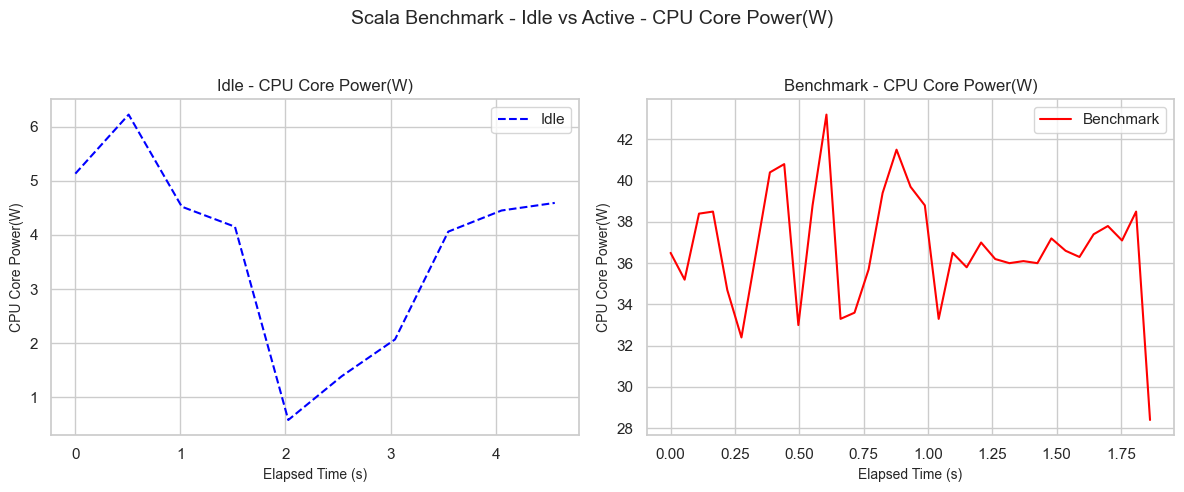

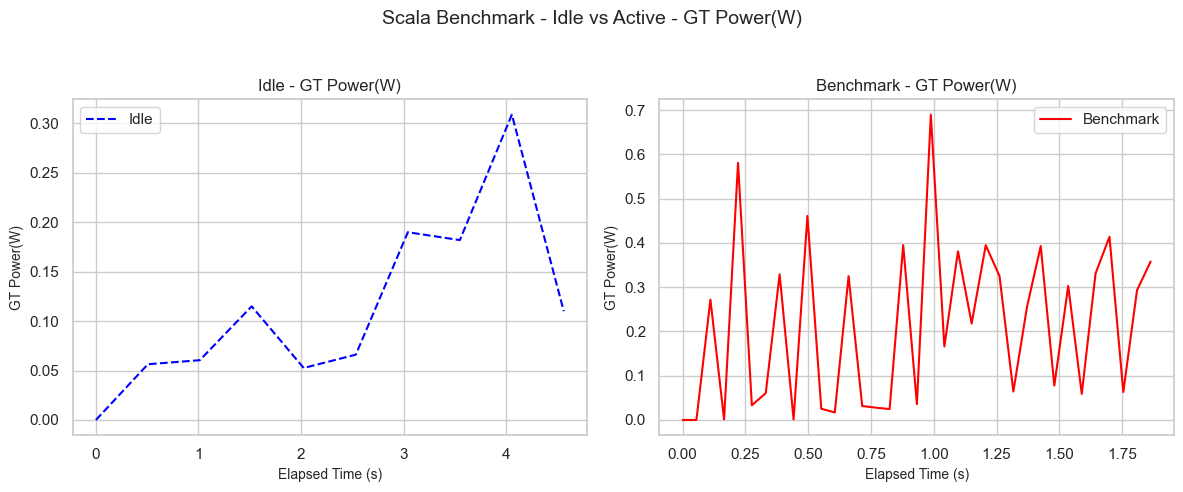

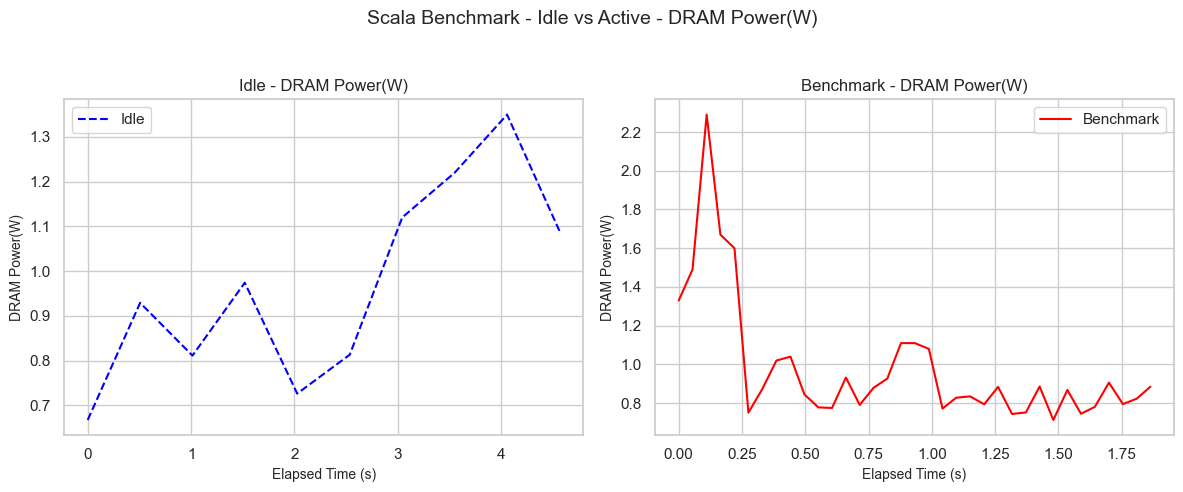

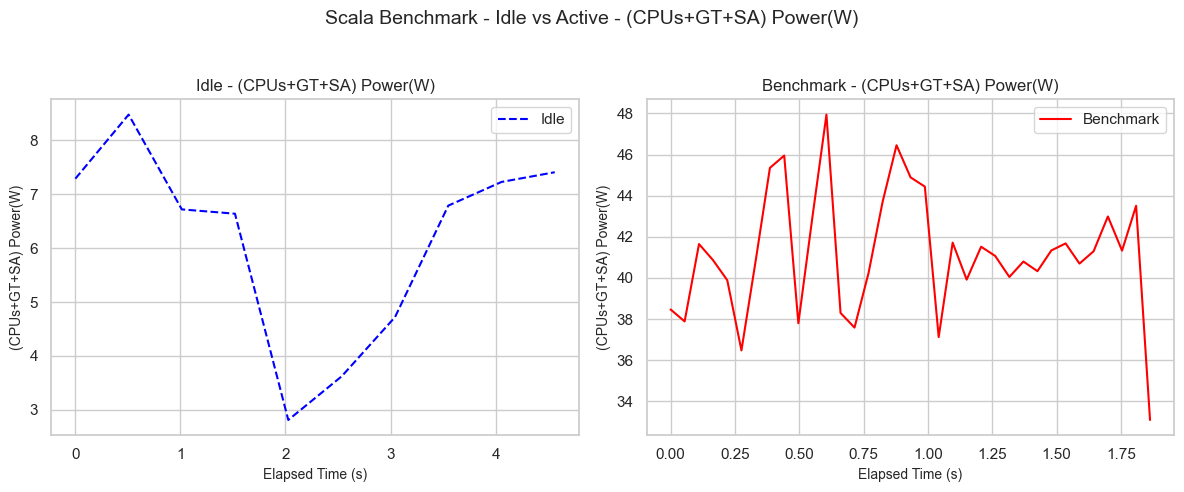

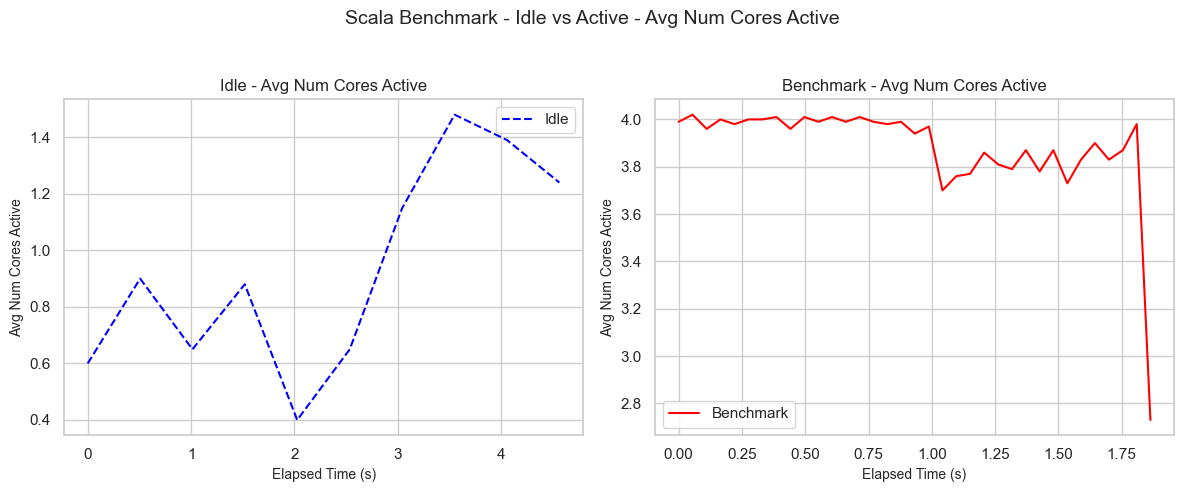

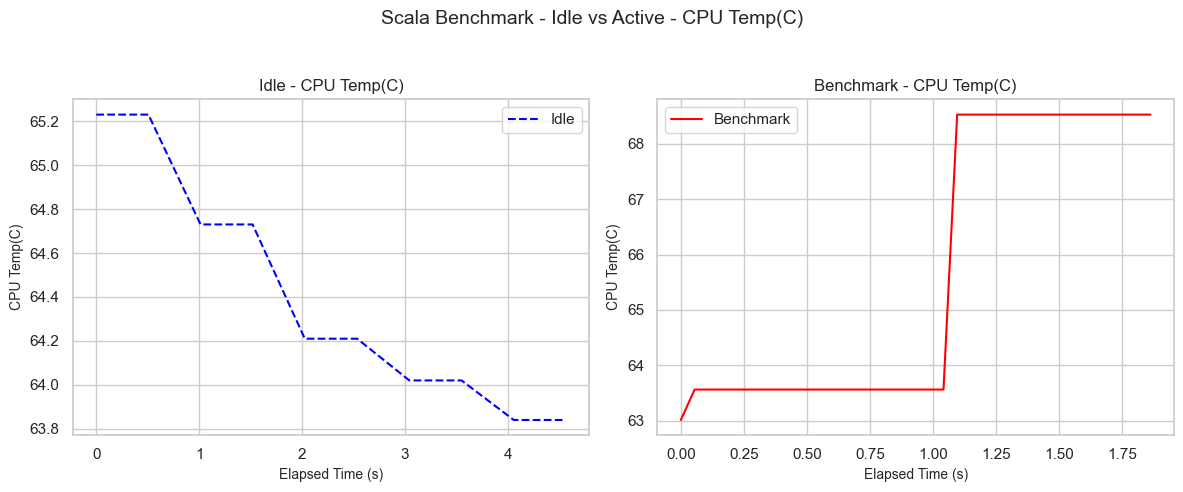

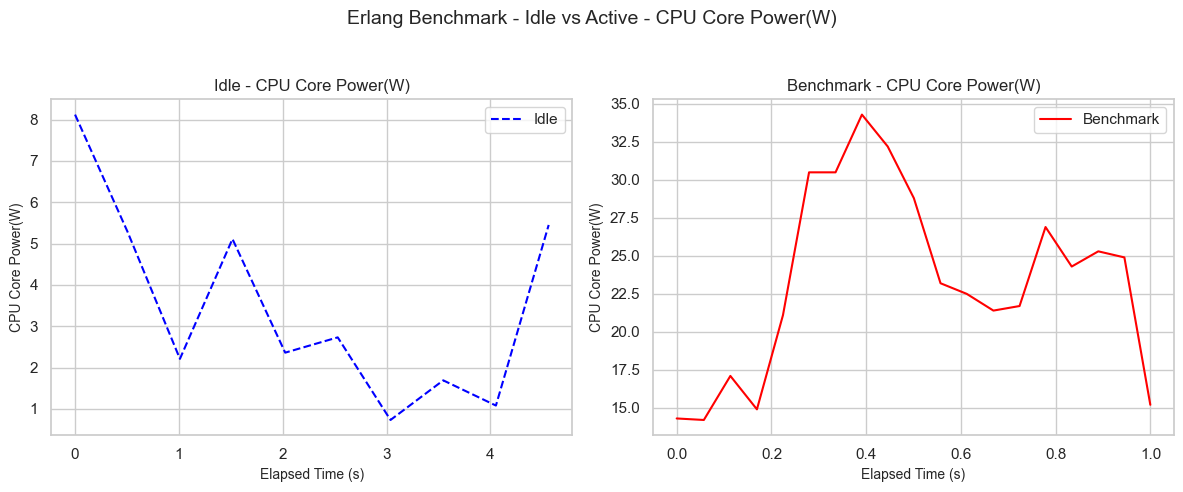

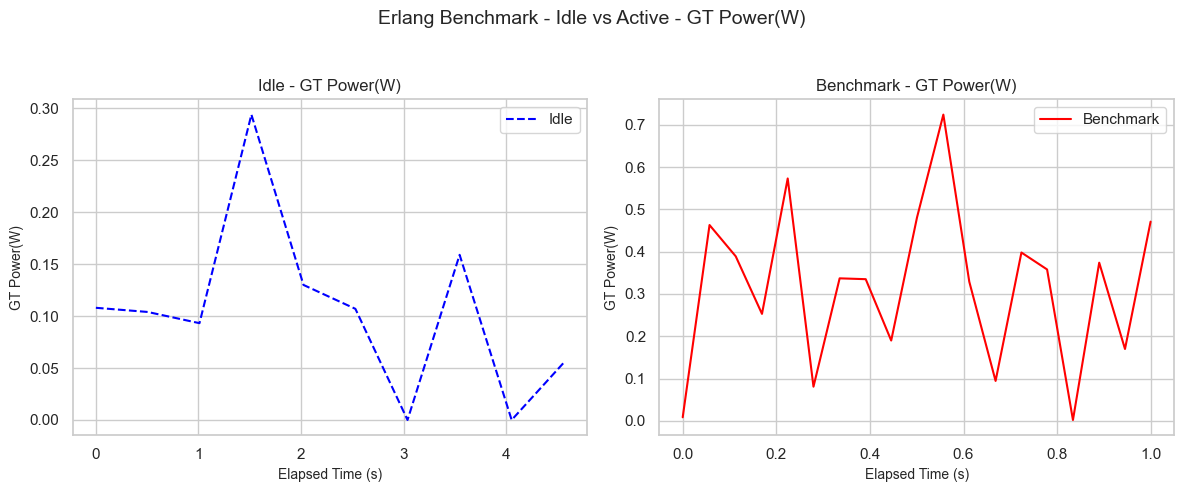

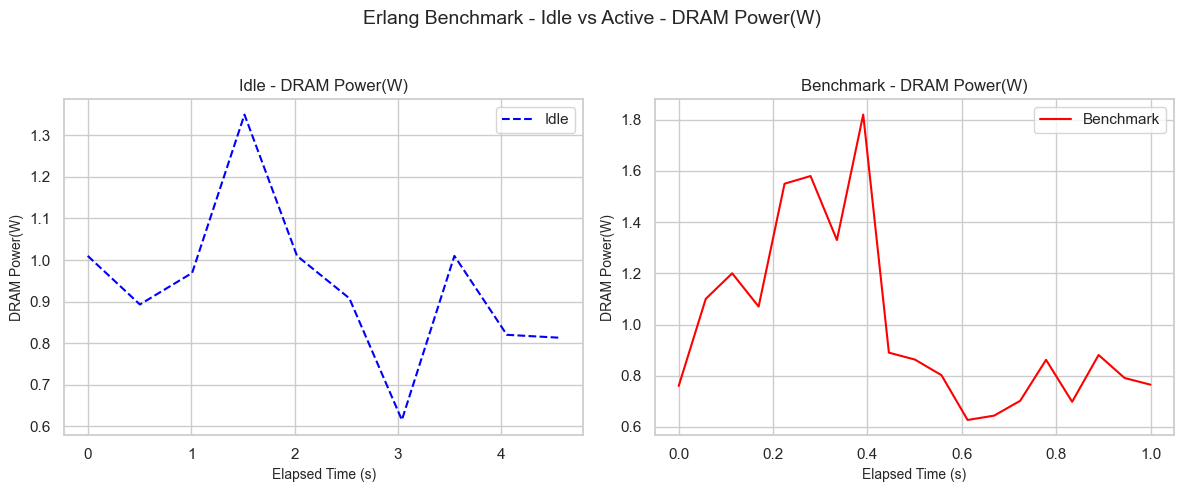

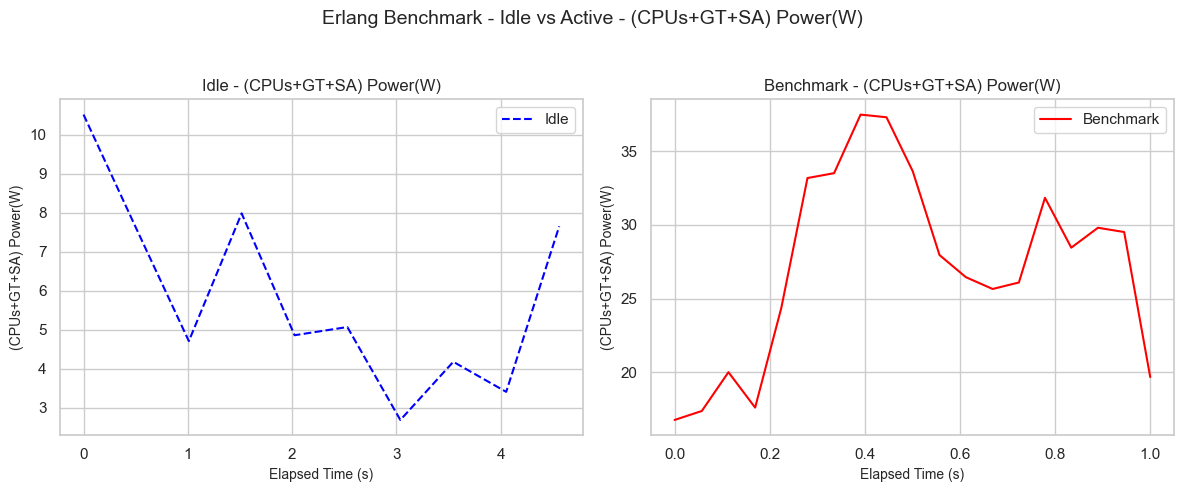

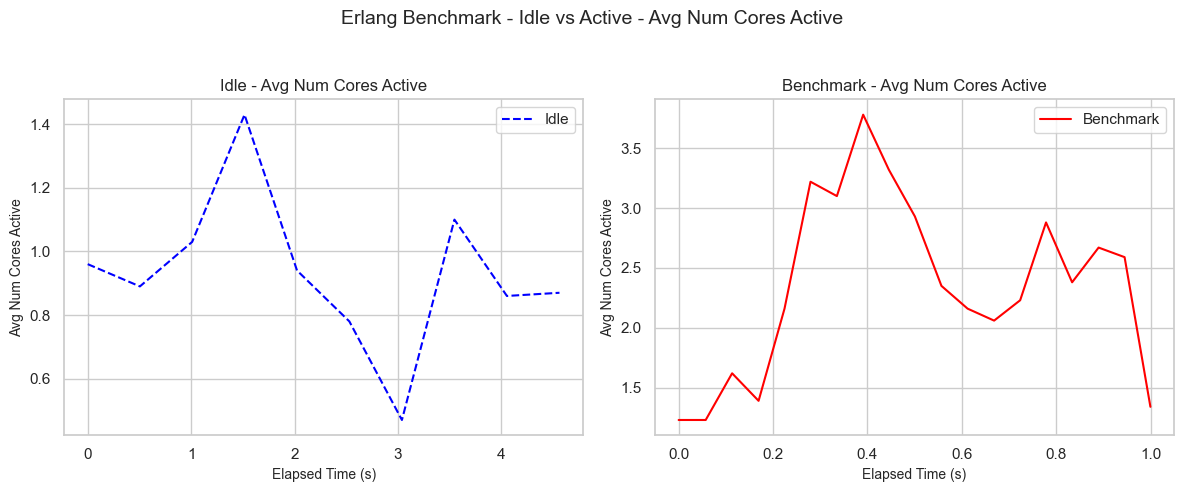

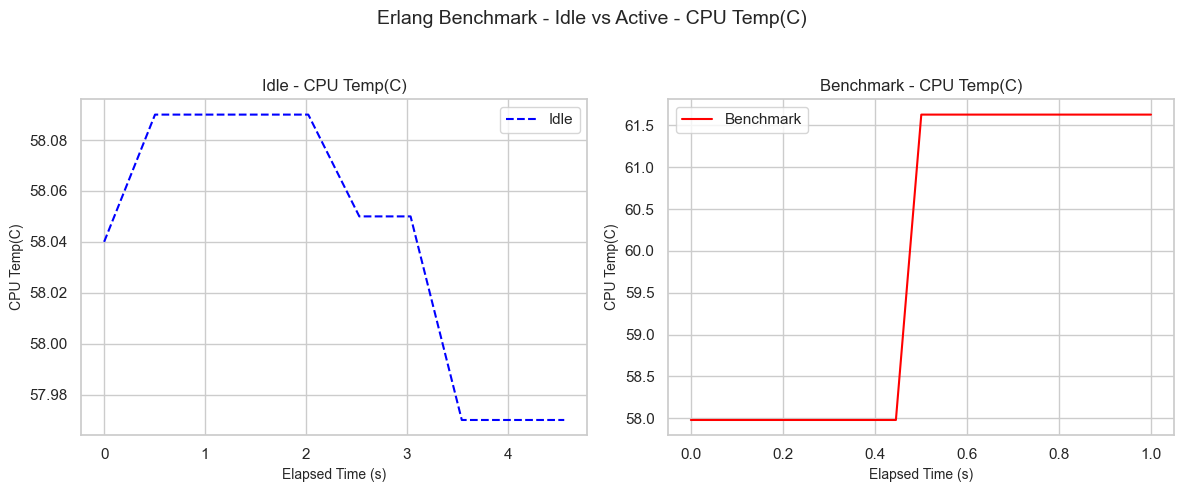

In [36]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [37]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [38]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

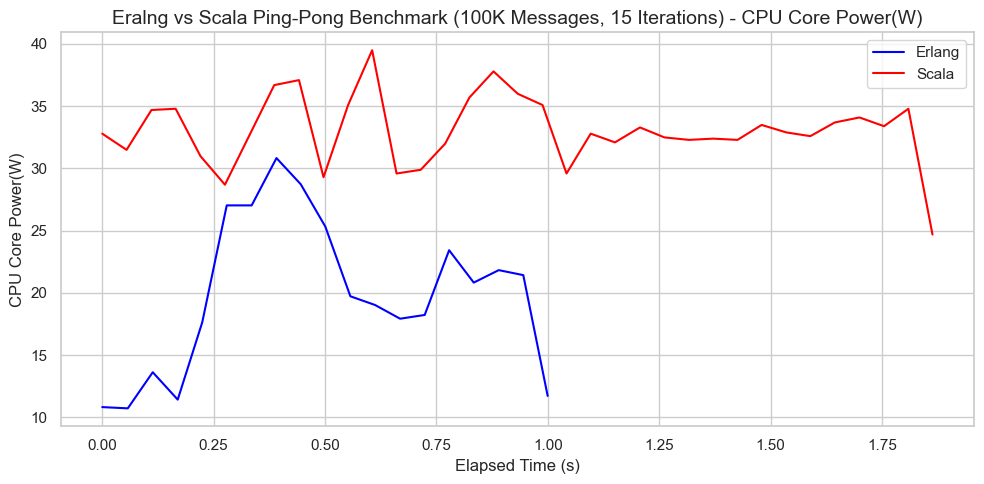

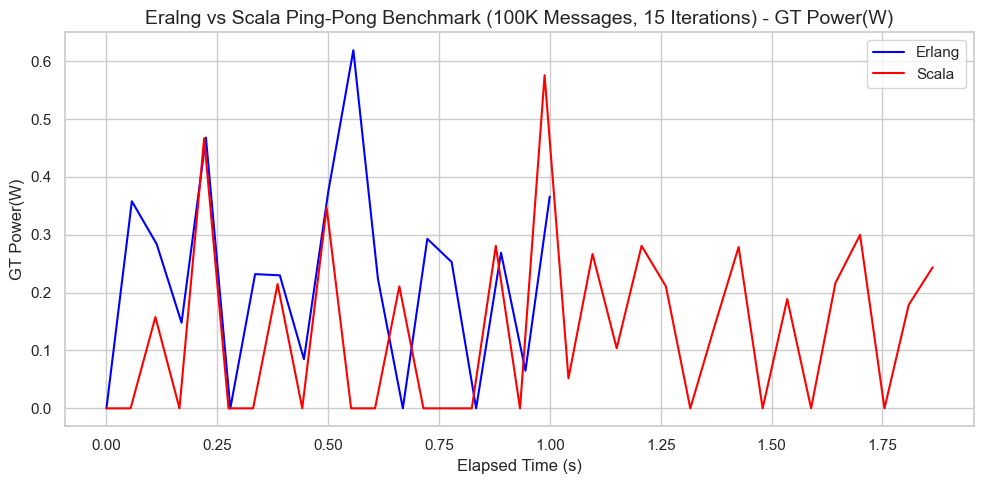

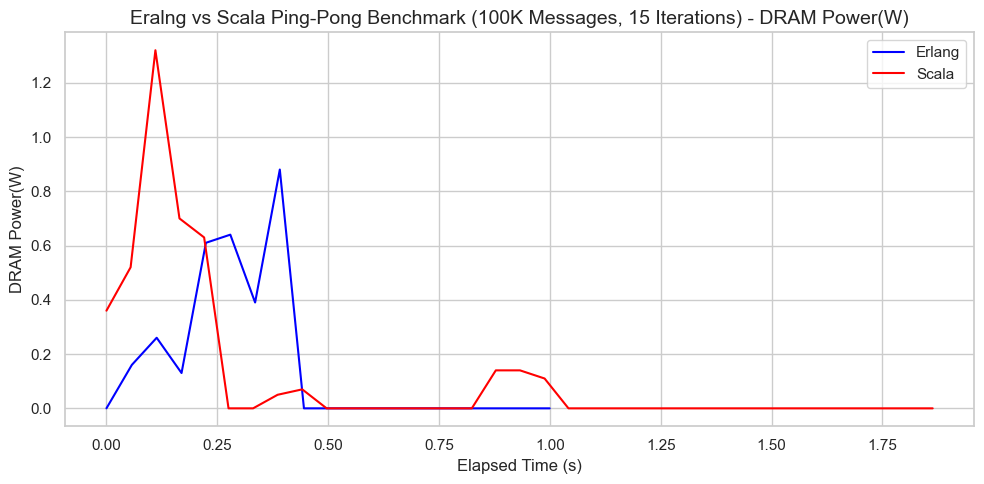

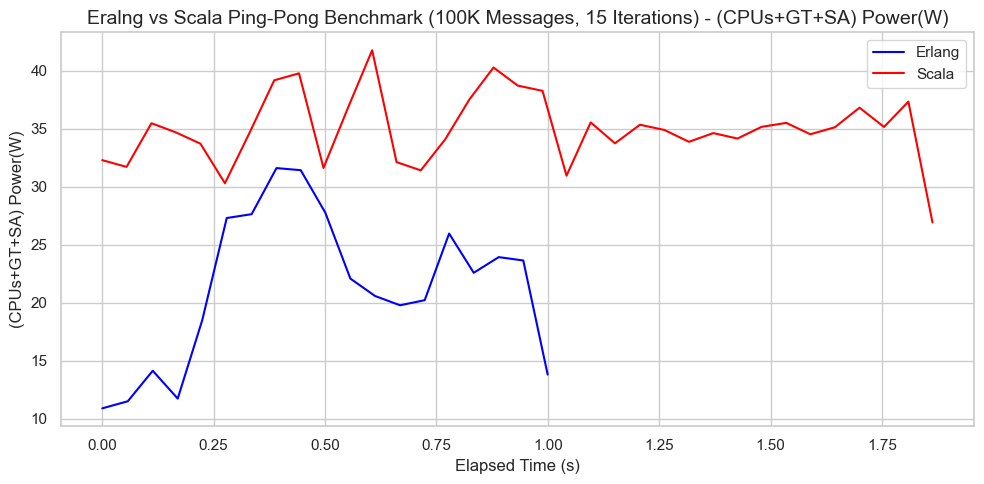

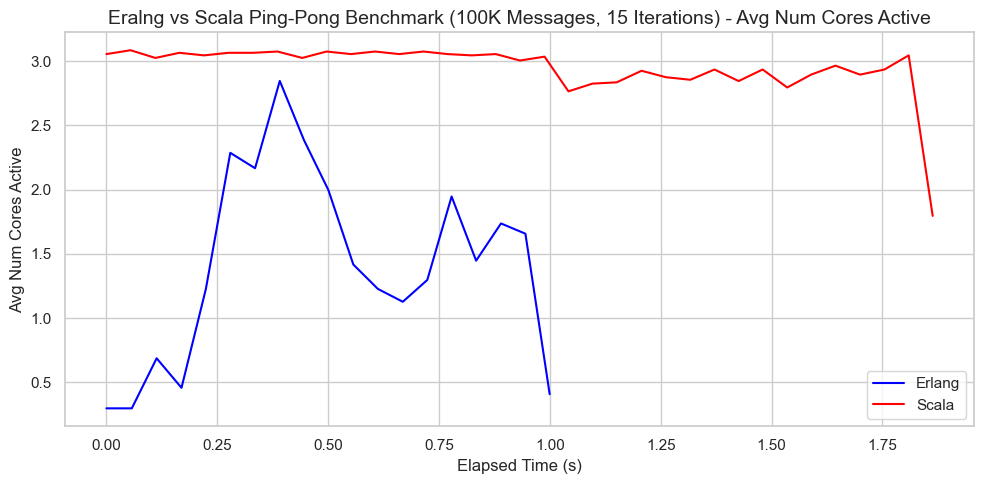

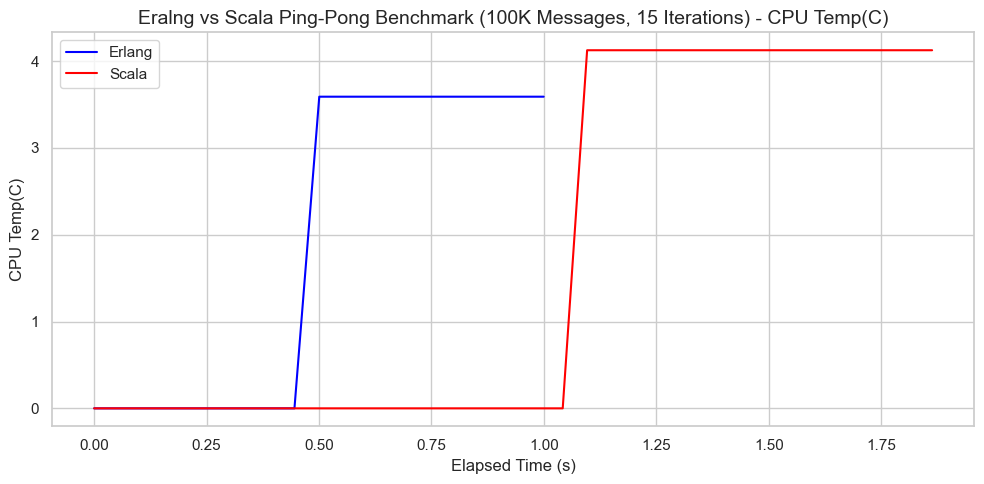

In [39]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [40]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [ ]:
# metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

# scala_idle_avgs = scala_idle_data[metrics_columns].mean()
# erlang_idle_avgs = erlang_idle_data[metrics_columns].mean()
# scala_bench_avgs = scala_bench_data[metrics_columns].mean()
# erlang_bench_avgs = erlang_bench_data[metrics_columns].mean()



# scala_net_avgs = scala_bench_avgs - scala_idle_avgs
# erlang_net_avgs = erlang_bench_avgs - erlang_idle_avgs


# print("Net Average Metrics Comparison:\n")
# print("Scala Benchmark:")
# print(scala_net_avgs, "\n")
# print("Erlang Benchmark:")
# print(erlang_net_avgs)

In [41]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        33.040843
GT Power(W)               0.097512
DRAM Power(W)             0.010086
(CPUs+GT+SA) Power(W)    34.979286
CPU Temp(C)               1.268286
Avg Num Cores Active      2.948286
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        19.854479
GT Power(W)               0.212392
DRAM Power(W)             0.056779
(CPUs+GT+SA) Power(W)    21.333474
CPU Temp(C)               1.860053
Avg Num Cores Active      1.416474
dtype: float64


Compute Total Energy Consumption

In [42]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


File created and results saved to ../../data/ping_pong/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 67.20115433571429 Joules
Erlang Benchmark: 22.537108269473688 Joules
